## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

## Rename the columns to make use easier

In [3]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

## Datatypes of Columns

In [4]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

## Checking for NaN values

In [5]:
df.isna().sum()

no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

## Data Exploration

In [6]:
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [8]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


## Several observations: 
### 1)Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
### 2)Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.
### 3)Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%

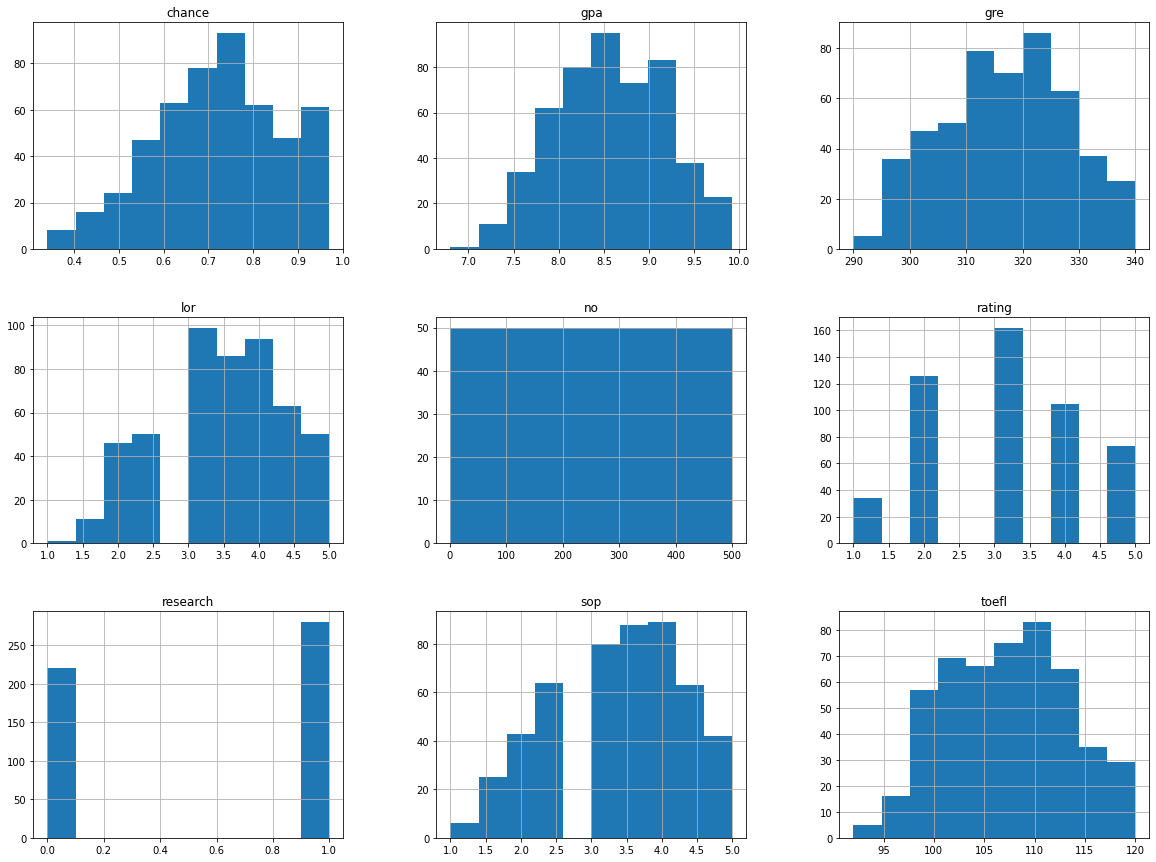

In [9]:
df.hist(bins=10, figsize=(20,15))
plt.show()


In [10]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

In [11]:
df.dtypes

gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     gre  toefl  rating  sop  lor   gpa  research
239  299    100       1  1.5  2.0  7.89         0
59   311    104       2  2.0  2.0  8.30         0
406  322    103       4  3.0  2.5  8.02         1
391  318    106       3  2.0  3.0  8.65         0
411  313     94       2  2.5  1.5  8.13         0
..   ...    ...     ...  ...  ...   ...       ...
323  305    102       2  2.0  2.5  8.18         0
192  322    114       5  4.5  4.0  8.94         1
117  290    104       4  2.0  2.5  7.46         0
47   339    119       5  4.5  4.0  9.70         0
172  322    110       4  4.0  5.0  9.13         1

[375 rows x 7 columns]
     gre  toefl  rating  sop  lor   gpa  research
90   318    106       2  4.0  4.0  7.92         1
254  321    114       4  4.0  5.0  9.12         0
283  321    111       3  2.5  3.0  8.90         1
445  328    116       5  4.5  5.0  9.08         1
461  301    102       3  2.5  2.0  8.13         1
..   ...    ...     ...  ...  ...   ...       ...
430  311    104       3  4

In [13]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
print(x_train)
print(x_test)

      gre     toefl  rating    sop    lor       gpa  research
239  0.18  0.285714    0.00  0.125  0.250  0.349359       0.0
59   0.42  0.428571    0.25  0.250  0.250  0.480769       0.0
406  0.64  0.392857    0.75  0.500  0.375  0.391026       1.0
391  0.56  0.500000    0.50  0.250  0.500  0.592949       0.0
411  0.46  0.071429    0.25  0.375  0.125  0.426282       0.0
..    ...       ...     ...    ...    ...       ...       ...
323  0.30  0.357143    0.25  0.250  0.375  0.442308       0.0
192  0.64  0.785714    1.00  0.875  0.750  0.685897       1.0
117  0.00  0.428571    0.75  0.250  0.375  0.211538       0.0
47   0.98  0.964286    1.00  0.875  0.750  0.929487       0.0
172  0.64  0.642857    0.75  0.750  1.000  0.746795       1.0

[375 rows x 7 columns]
      gre     toefl  rating    sop    lor       gpa  research
90   0.56  0.500000    0.25  0.750  0.750  0.358974       1.0
254  0.62  0.785714    0.75  0.750  1.000  0.743590       0.0
283  0.62  0.678571    0.50  0.375  0.500  0.6

<ipython-input-13-64e19da921a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
c:\users\windows 10\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-13-64e19da921a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

### In order to make regression models, outcome of the regression is defined as 'status' which takes value of True for the applicants that have more than 83% chance. Third quartile, 83%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [14]:

cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)
#print(cy_train)
cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=65, random_state=42)
rfr.fit(x_train,cy_train)

RandomForestRegressor(n_estimators=65, random_state=42)

In [16]:
#f_imp=pd.Series(rfr.feature_importances_,index=x_train.columns).sort_values(ascending=False)
#print(f_imp)

In [17]:
y_pred=rfr.predict(x_test)

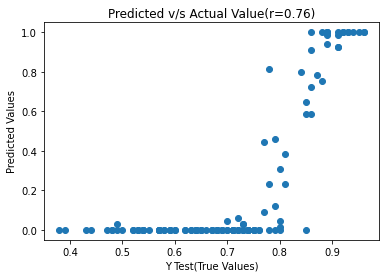

In [18]:
from scipy.stats import pearsonr
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted v/s Actual Value(r={0:0.2f})'.format(pearsonr(y_test,y_pred)[0]))
plt.show()

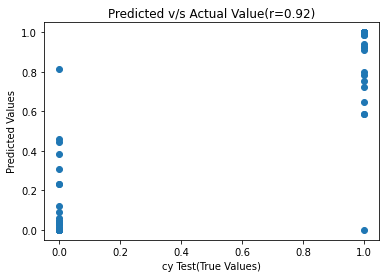

In [19]:
from scipy.stats import pearsonr
plt.scatter(cy_test,y_pred)
plt.xlabel('cy Test(True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted v/s Actual Value(r={0:0.2f})'.format(pearsonr(cy_test,y_pred)[0]))
plt.show()

In [20]:
import sklearn.metrics as met
mse=met.mean_squared_error(cy_test,y_pred)
rmse=np.sqrt(mse)
r2_score=met.r2_score(cy_test,y_pred)
print(mse)
print(rmse)
print(r2_score)

0.025435266272189352
0.1594843762635994
0.8536722991520771


In [21]:
x1=df.iloc[:,5:6].values
print(x1)


[[9.65]
 [8.87]
 [8.  ]
 [8.67]
 [8.21]
 [9.34]
 [8.2 ]
 [7.9 ]
 [8.  ]
 [8.6 ]
 [8.4 ]
 [9.  ]
 [9.1 ]
 [8.  ]
 [8.2 ]
 [8.3 ]
 [8.7 ]
 [8.  ]
 [8.8 ]
 [8.5 ]
 [7.9 ]
 [8.4 ]
 [9.5 ]
 [9.7 ]
 [9.8 ]
 [9.6 ]
 [8.8 ]
 [7.5 ]
 [7.2 ]
 [7.3 ]
 [8.1 ]
 [8.3 ]
 [9.4 ]
 [9.6 ]
 [9.8 ]
 [9.2 ]
 [8.4 ]
 [7.8 ]
 [7.5 ]
 [7.7 ]
 [8.  ]
 [8.2 ]
 [8.5 ]
 [9.1 ]
 [9.4 ]
 [9.1 ]
 [9.3 ]
 [9.7 ]
 [8.85]
 [8.4 ]
 [8.3 ]
 [7.9 ]
 [8.  ]
 [8.1 ]
 [8.  ]
 [7.7 ]
 [7.4 ]
 [7.6 ]
 [6.8 ]
 [8.3 ]
 [8.1 ]
 [8.2 ]
 [8.2 ]
 [8.5 ]
 [8.7 ]
 [8.92]
 [9.02]
 [8.64]
 [9.22]
 [9.16]
 [9.64]
 [9.76]
 [9.45]
 [9.04]
 [8.9 ]
 [8.56]
 [8.72]
 [8.22]
 [7.54]
 [7.36]
 [8.02]
 [9.5 ]
 [9.22]
 [9.36]
 [9.45]
 [8.66]
 [8.42]
 [8.28]
 [8.14]
 [8.76]
 [7.92]
 [7.66]
 [8.03]
 [7.88]
 [7.66]
 [7.84]
 [8.  ]
 [8.96]
 [9.24]
 [8.88]
 [8.46]
 [8.12]
 [8.25]
 [8.47]
 [9.05]
 [8.78]
 [9.18]
 [9.46]
 [9.38]
 [8.64]
 [8.48]
 [8.68]
 [8.34]
 [8.56]
 [8.45]
 [9.04]
 [8.62]
 [7.46]
 [7.28]
 [8.84]
 [9.56]
 [9.48]
 [8.36]
 [8.22]
 [8.47]


## Finding co-relation b/w chance of admit and other features

In [22]:
COA_corr = pd.DataFrame(df.corr()['chance'])

In [23]:
COA_corr

,chance
gre,0.810351
toefl,0.792228
rating,0.690132
sop,0.684137
lor,0.645365
gpa,0.882413
research,0.545871
chance,1.000000


In [24]:
#sorting correlations in descending manner
COA_corr.sort_values(['chance'], ascending = False, inplace = True)

In [25]:
COA_corr

,chance
chance,1.000000
gpa,0.882413
gre,0.810351
toefl,0.792228
rating,0.690132
sop,0.684137
lor,0.645365
research,0.545871


In [26]:
#dropping the 'Chance of Admit' from the correlations rows
COA_corr.drop('chance', inplace = True)

In [27]:
COA_corr

,chance
gpa,0.882413
gre,0.810351
toefl,0.792228
rating,0.690132
sop,0.684137
lor,0.645365
research,0.545871


In [28]:
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['chance']

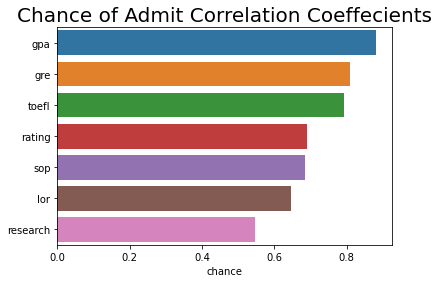

In [29]:
import seaborn as sns
sns.barplot(y = COA_corr_x, x = COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size = 20)
plt.show()


In [30]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfr, threshold=0.2)
# Train the selector
sfm.fit(x_train, cy_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=65,
                                                random_state=42),
                threshold=0.2)

In [31]:
#Create a list of feature names
feat_labels = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

CGPA


### Thus CGPA is the most affecting feature in model.